In [1]:
# Lets get started
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
mydata=pd.read_csv("customer_churn.csv")
mydata.head()
df=mydata.iloc[:,3:]
df.head()

y=df.iloc[:,-1]
y.head()

X=df.iloc[:,:- 1]
X.head()
#Basic Data Preprocessing
# Create Dummy Variables
geo=pd.get_dummies(X.iloc[:,1],drop_first=True)
gen=pd.get_dummies(X.iloc[:,2],drop_first=True)

#Drop Old Variables which are replaced by Dumay Variables
X.head()
X=X.drop(['Geography','Gender'],axis=1)
X.head()
X=pd.concat([X,geo,gen],axis=1)
X.head()
## 100 % same for all problem

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
model= Sequential()

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(Dense(units=3, activation='relu', input_dim=11))


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.add(Dense(units=16, activation='relu'))


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.add(Dense(units=2, activation='relu'))


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134 (536.00 B)

 Trainable params: 134 (536.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

- model= Sequential()
- model.add(Dense(units=3, activation='relu', input_dim=11))
- model.add(Dense(units=16, activation='relu'))
- model.add(Dense(units=2, activation='relu'))
- model.add(Dense(units=1, activation='sigmoid'))
- model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
X_train.shape

(6700, 11)

In [7]:
6700/32

209.375

In [6]:
history= model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.4994 - loss: 0.7886
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.7948 - loss: 0.6218
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.7915 - loss: 0.5227
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.7927 - loss: 0.4893
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.7897 - loss: 0.4837
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.7976 - loss: 0.4622
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.7958 - loss: 0.4602
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.7963 - loss: 0.4538
Epoch 9/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7918 - loss: 0.4542
Epoch 10/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.7998 - loss: 0.4294
Epoch 11/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8015 - loss: 0.4330
Epoch 12/50
210/210 ━━━━━━━━━━

In [8]:
history.history

{'accuracy': [0.6570149064064026,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.7919402718544006,
  0.8070149421691895,
  0.8171641826629639,
  0.8183581829071045,
  0.8191044926643372,
  0.8204477429389954,
  0.8197014927864075,
  0.8205969929695129,
  0.8205969929695129,
  0.8216418027877808,
  0.8228358030319214,
  0.8234328627586365,
  0.8223880529403687,
  0.8225373029708862,
  0.8241791129112244,
  0.8237313628196716,
  0.8237313628196716,
  0.8241791129112244,
  0.8241791129112244,
  0.8249253630638123,
  0.8256716132164001,
  0.8255223631858826,
  0.8270149230957031,
  0.8283582329750061,
  0.8271641731262207,
  0.8276119232177734

In [10]:
df= pd.DataFrame(history.history)
df.head(10)

,accuracy,loss
0,0.657015,0.709305
1,0.791940,0.598432
2,0.791940,0.512282
3,0.791940,0.489147
4,0.791940,0.477553
5,0.791940,0.468645
6,0.791940,0.460729
7,0.791940,0.454324
8,0.791940,0.449003
9,0.791940,0.444282


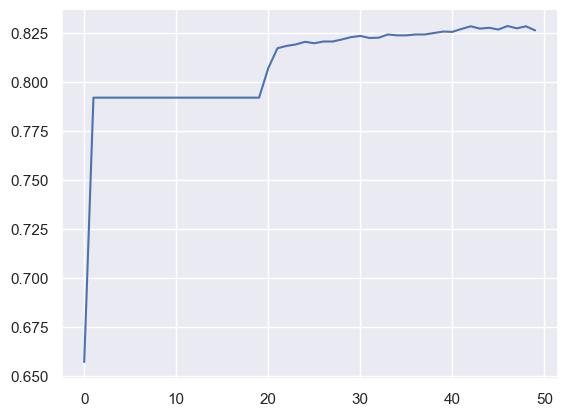

In [11]:
plt.plot(df.accuracy)

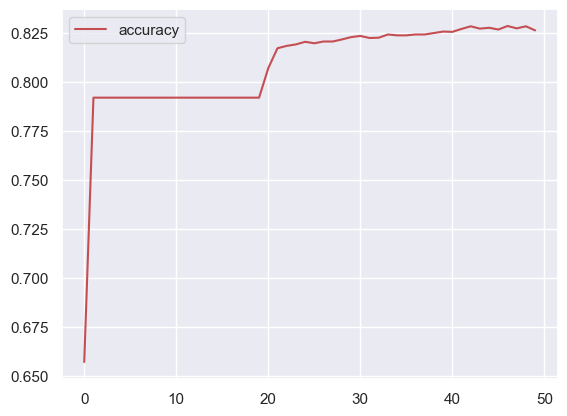

In [12]:
plt.plot(df.accuracy,label='accuracy',c='r');
plt.legend();

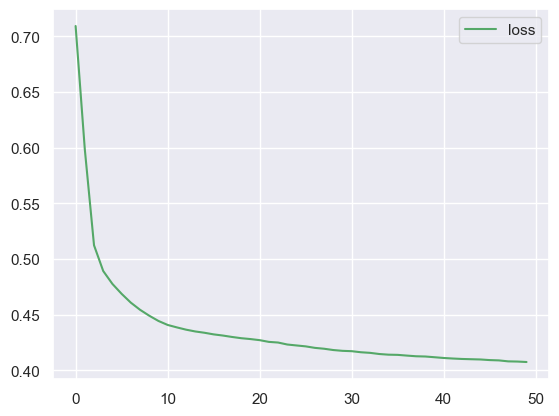

In [13]:
plt.plot(df.loss,label='loss',c='g');
plt.legend();


In [14]:
model.evaluate(X_test,y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.8389 - loss: 0.4009


[0.39574959874153137, 0.8427272439002991]